In [ ]:
%load_ext autoreload
%autoreload 2


import torch
from model import LofiModel
from config import *
from train import train
print(torch.__version__)
print(torch.version.cuda)

# Config

In [ ]:
model = LofiModel()
model.load_weights(r"./lofi_model_epoch_200.pth")
print(model)
print(f"Model has {sum(p.numel() for p in model.parameters()) / 1e6:.2f} M parameters.\n")

# Training

Epoch 318/400 [Training]: 100%|██████████| 3660/3660 [01:42<00:00, 35.79it/s, Loss=0.0006, Recon=0.0006, KL=0.3652, beta=0.0500]



Epoch 318 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0261


Epoch 319/400 [Training]: 100%|██████████| 3660/3660 [01:39<00:00, 36.68it/s, Loss=0.0011, Recon=0.0011, KL=0.3076, beta=0.0500]



Epoch 319 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0261


Epoch 320/400 [Training]: 100%|██████████| 3660/3660 [01:40<00:00, 36.56it/s, Loss=0.0030, Recon=0.0008, KL=0.6437, beta=0.0500]



Epoch 320 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0262
Checkpoint saved to checkpoints/lofi_model_epoch_320.pth

Generating visualization for epoch 320:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


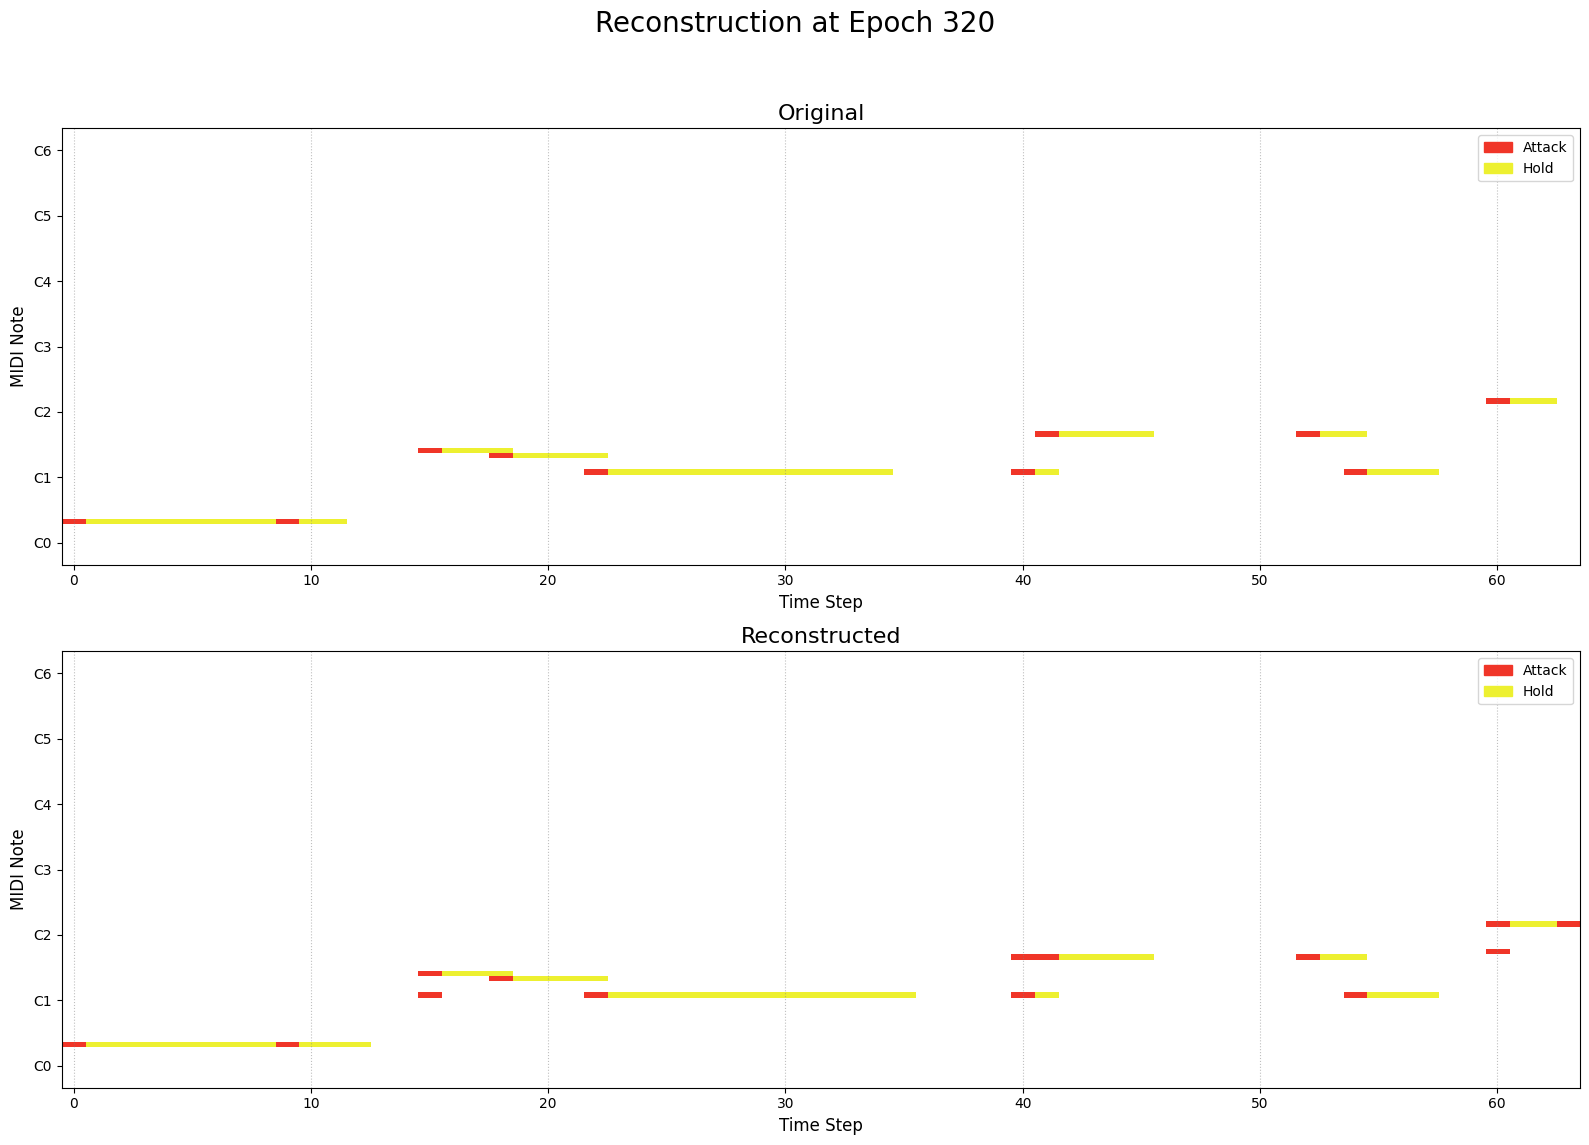

____________________________________________________________ 



Epoch 321/400 [Training]: 100%|██████████| 3660/3660 [01:42<00:00, 35.57it/s, Loss=0.0274, Recon=0.0072, KL=1.0034, beta=0.0500]



Epoch 321 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0261


Epoch 322/400 [Training]: 100%|██████████| 3660/3660 [01:40<00:00, 36.25it/s, Loss=0.0001, Recon=0.0001, KL=0.2650, beta=0.0500]



Epoch 322 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0262


Epoch 323/400 [Training]: 100%|██████████| 3660/3660 [01:43<00:00, 35.44it/s, Loss=0.0341, Recon=0.0041, KL=1.2018, beta=0.0500]



Epoch 323 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0261


Epoch 324/400 [Training]: 100%|██████████| 3660/3660 [01:41<00:00, 36.03it/s, Loss=0.0084, Recon=0.0007, KL=0.7552, beta=0.0500]



Epoch 324 Summary: Avg Train Loss: 0.0022, Avg Val Loss: 0.0262


Epoch 325/400 [Training]: 100%|██████████| 3660/3660 [01:40<00:00, 36.29it/s, Loss=0.0004, Recon=0.0004, KL=0.5189, beta=0.0500]



Epoch 325 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0262
Checkpoint saved to checkpoints/lofi_model_epoch_325.pth


Epoch 326/400 [Training]: 100%|██████████| 3660/3660 [01:39<00:00, 36.68it/s, Loss=0.0029, Recon=0.0028, KL=0.6033, beta=0.0500]



Epoch 326 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0261


Epoch 327/400 [Training]: 100%|██████████| 3660/3660 [01:38<00:00, 37.01it/s, Loss=0.0003, Recon=0.0003, KL=0.3121, beta=0.0500]



Epoch 327 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0260


Epoch 328/400 [Training]: 100%|██████████| 3660/3660 [01:42<00:00, 35.77it/s, Loss=0.0001, Recon=0.0001, KL=0.4922, beta=0.0500]



Epoch 328 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0262


Epoch 329/400 [Training]: 100%|██████████| 3660/3660 [01:35<00:00, 38.33it/s, Loss=0.0001, Recon=0.0001, KL=0.4096, beta=0.0500]



Epoch 329 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0263


Epoch 330/400 [Training]: 100%|██████████| 3660/3660 [01:36<00:00, 37.91it/s, Loss=0.0004, Recon=0.0004, KL=0.2750, beta=0.0500]



Epoch 330 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0261
Checkpoint saved to checkpoints/lofi_model_epoch_330.pth

Generating visualization for epoch 330:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


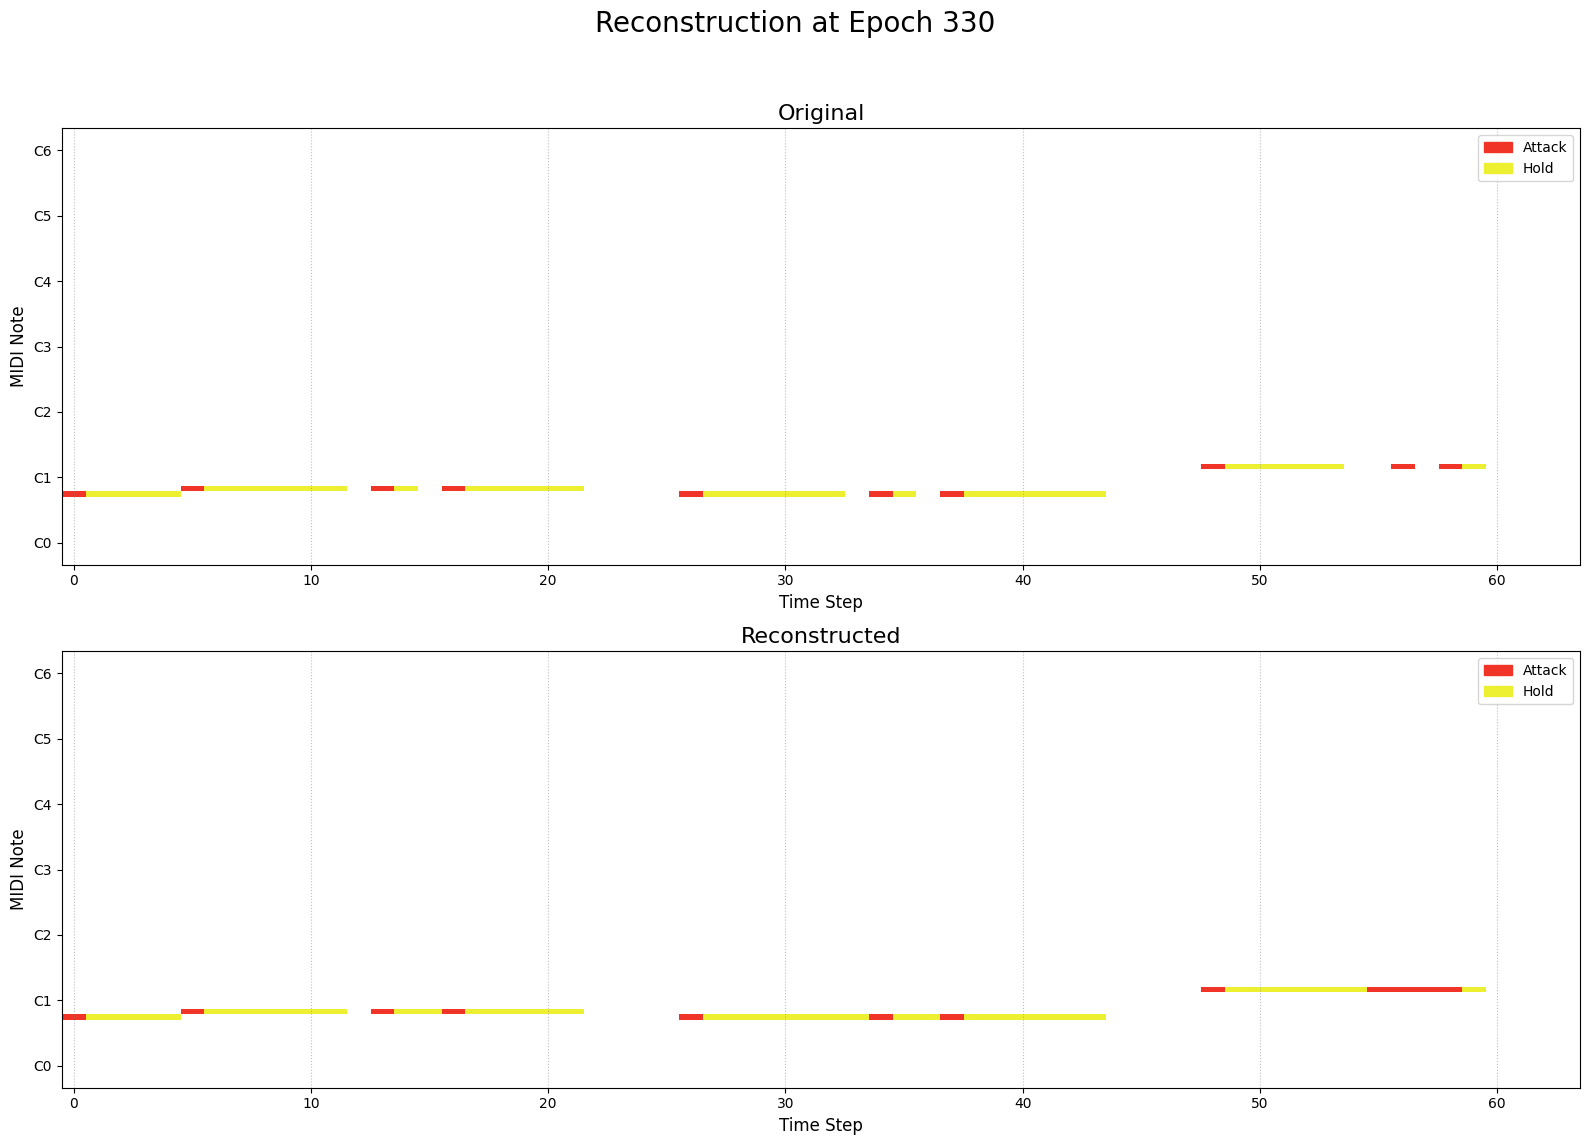

____________________________________________________________ 



Epoch 331/400 [Training]: 100%|██████████| 3660/3660 [01:36<00:00, 37.82it/s, Loss=0.0011, Recon=0.0010, KL=0.6029, beta=0.0500]



Epoch 331 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0262


Epoch 332/400 [Training]: 100%|██████████| 3660/3660 [01:37<00:00, 37.61it/s, Loss=0.0000, Recon=0.0000, KL=0.4180, beta=0.0500]



Epoch 332 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0261


Epoch 333/400 [Training]: 100%|██████████| 3660/3660 [01:35<00:00, 38.33it/s, Loss=0.0011, Recon=0.0011, KL=0.4544, beta=0.0500]



Epoch 333 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0262


Epoch 334/400 [Training]: 100%|██████████| 3660/3660 [01:40<00:00, 36.58it/s, Loss=0.0013, Recon=0.0013, KL=0.5089, beta=0.0500]



Epoch 334 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0262


Epoch 335/400 [Training]: 100%|██████████| 3660/3660 [01:40<00:00, 36.34it/s, Loss=0.0000, Recon=0.0000, KL=0.3639, beta=0.0500]



Epoch 335 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0260
Checkpoint saved to checkpoints/lofi_model_epoch_335.pth


Epoch 336/400 [Training]: 100%|██████████| 3660/3660 [01:39<00:00, 36.83it/s, Loss=0.0001, Recon=0.0001, KL=0.5459, beta=0.0500]



Epoch 336 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0262


Epoch 337/400 [Training]: 100%|██████████| 3660/3660 [01:39<00:00, 36.86it/s, Loss=0.0003, Recon=0.0003, KL=0.4136, beta=0.0500]



Epoch 337 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0263


Epoch 338/400 [Training]: 100%|██████████| 3660/3660 [01:39<00:00, 36.71it/s, Loss=0.0013, Recon=0.0013, KL=0.5404, beta=0.0500]



Epoch 338 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0261


Epoch 339/400 [Training]: 100%|██████████| 3660/3660 [01:38<00:00, 37.00it/s, Loss=0.0017, Recon=0.0005, KL=0.6243, beta=0.0500]



Epoch 339 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0265


Epoch 340/400 [Training]: 100%|██████████| 3660/3660 [01:38<00:00, 37.09it/s, Loss=0.0313, Recon=0.0071, KL=1.0833, beta=0.0500]



Epoch 340 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0259
Checkpoint saved to checkpoints/lofi_model_epoch_340.pth

Generating visualization for epoch 340:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


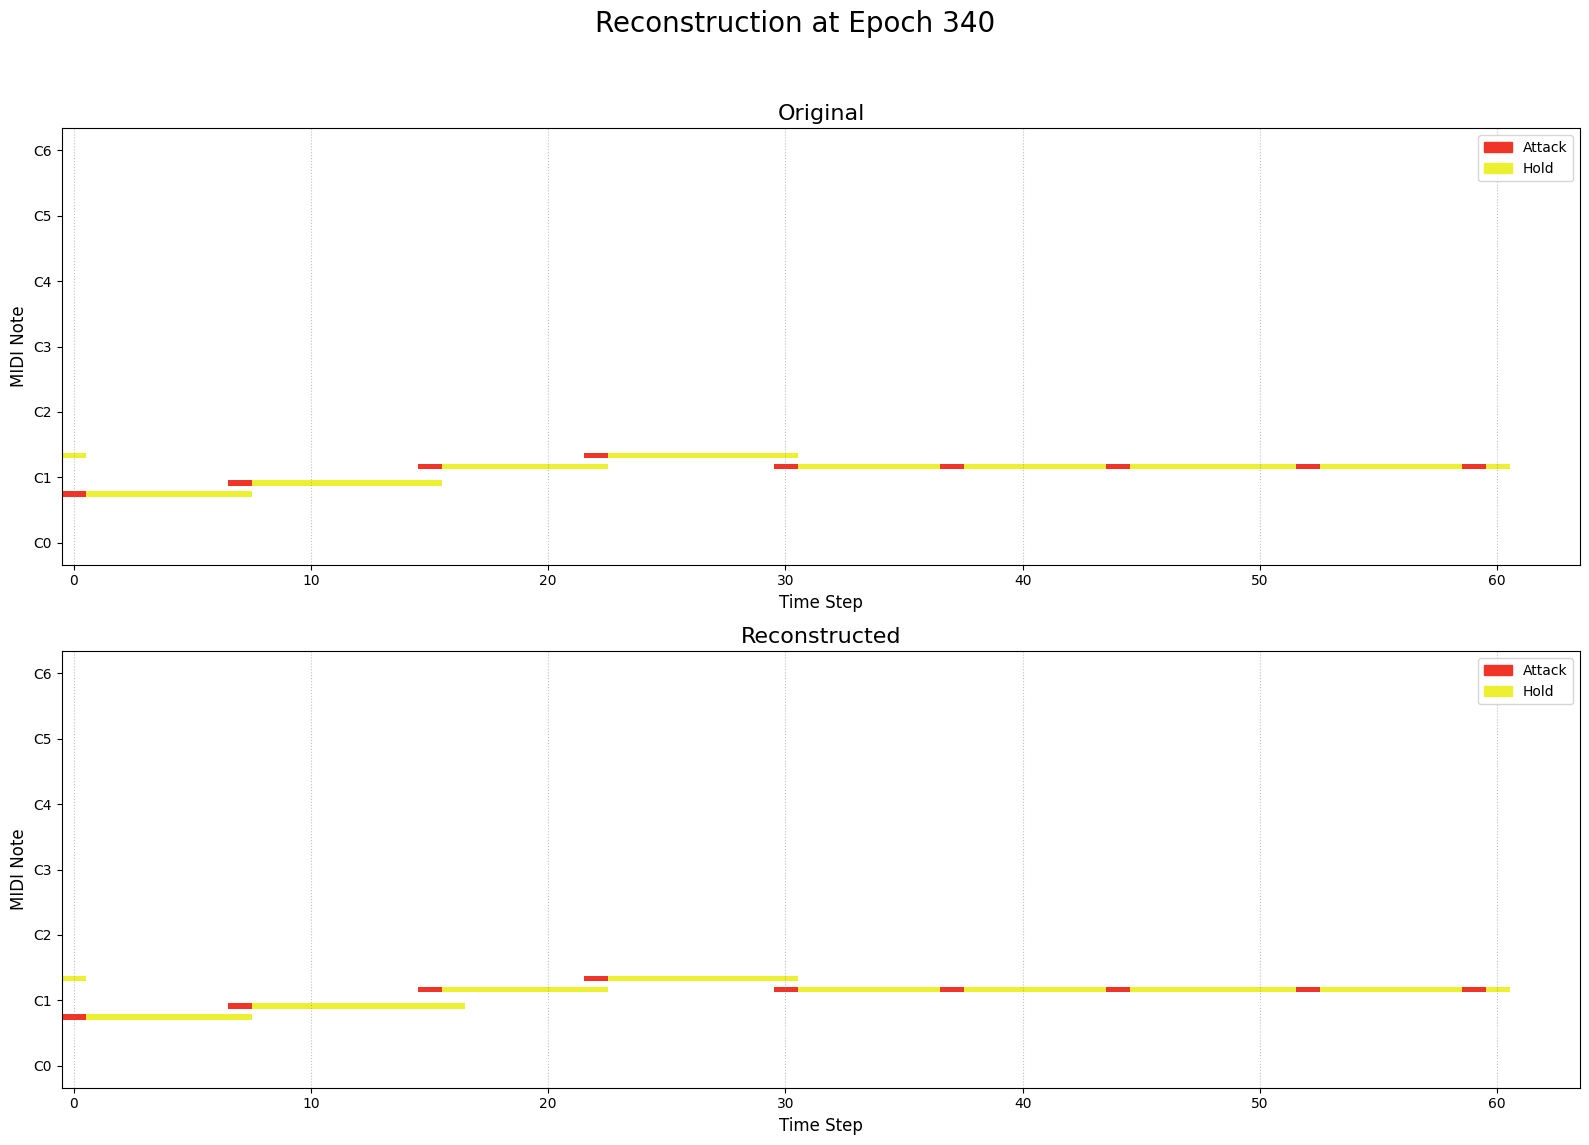

____________________________________________________________ 



Epoch 341/400 [Training]: 100%|██████████| 3660/3660 [01:38<00:00, 37.13it/s, Loss=0.0047, Recon=0.0002, KL=0.6885, beta=0.0500]



Epoch 341 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0260


Epoch 342/400 [Training]: 100%|██████████| 3660/3660 [01:37<00:00, 37.57it/s, Loss=0.0001, Recon=0.0001, KL=0.2799, beta=0.0500]



Epoch 342 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0262


Epoch 343/400 [Training]: 100%|██████████| 3660/3660 [01:35<00:00, 38.42it/s, Loss=0.0311, Recon=0.0075, KL=1.0713, beta=0.0500]



Epoch 343 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0263


Epoch 344/400 [Training]: 100%|██████████| 3660/3660 [01:35<00:00, 38.44it/s, Loss=0.0007, Recon=0.0007, KL=0.3207, beta=0.0500]



Epoch 344 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0260


Epoch 345/400 [Training]: 100%|██████████| 3660/3660 [01:40<00:00, 36.29it/s, Loss=0.0047, Recon=0.0006, KL=0.6823, beta=0.0500]



Epoch 345 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0261
Checkpoint saved to checkpoints/lofi_model_epoch_345.pth


Epoch 346/400 [Training]: 100%|██████████| 3660/3660 [01:39<00:00, 36.67it/s, Loss=0.0148, Recon=0.0008, KL=0.8800, beta=0.0500]



Epoch 346 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0262


Epoch 347/400 [Training]: 100%|██████████| 3660/3660 [01:39<00:00, 36.83it/s, Loss=0.0001, Recon=0.0001, KL=0.2460, beta=0.0500]



Epoch 347 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0261


Epoch 348/400 [Training]: 100%|██████████| 3660/3660 [01:40<00:00, 36.54it/s, Loss=0.0258, Recon=0.0089, KL=0.9381, beta=0.0500]



Epoch 348 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0263


Epoch 349/400 [Training]: 100%|██████████| 3660/3660 [01:43<00:00, 35.43it/s, Loss=0.0001, Recon=0.0001, KL=0.5229, beta=0.0500]



Epoch 349 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0259


Epoch 350/400 [Training]: 100%|██████████| 3660/3660 [01:41<00:00, 36.24it/s, Loss=0.0002, Recon=0.0002, KL=0.2471, beta=0.0500]



Epoch 350 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0259
Checkpoint saved to checkpoints/lofi_model_epoch_350.pth

Generating visualization for epoch 350:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


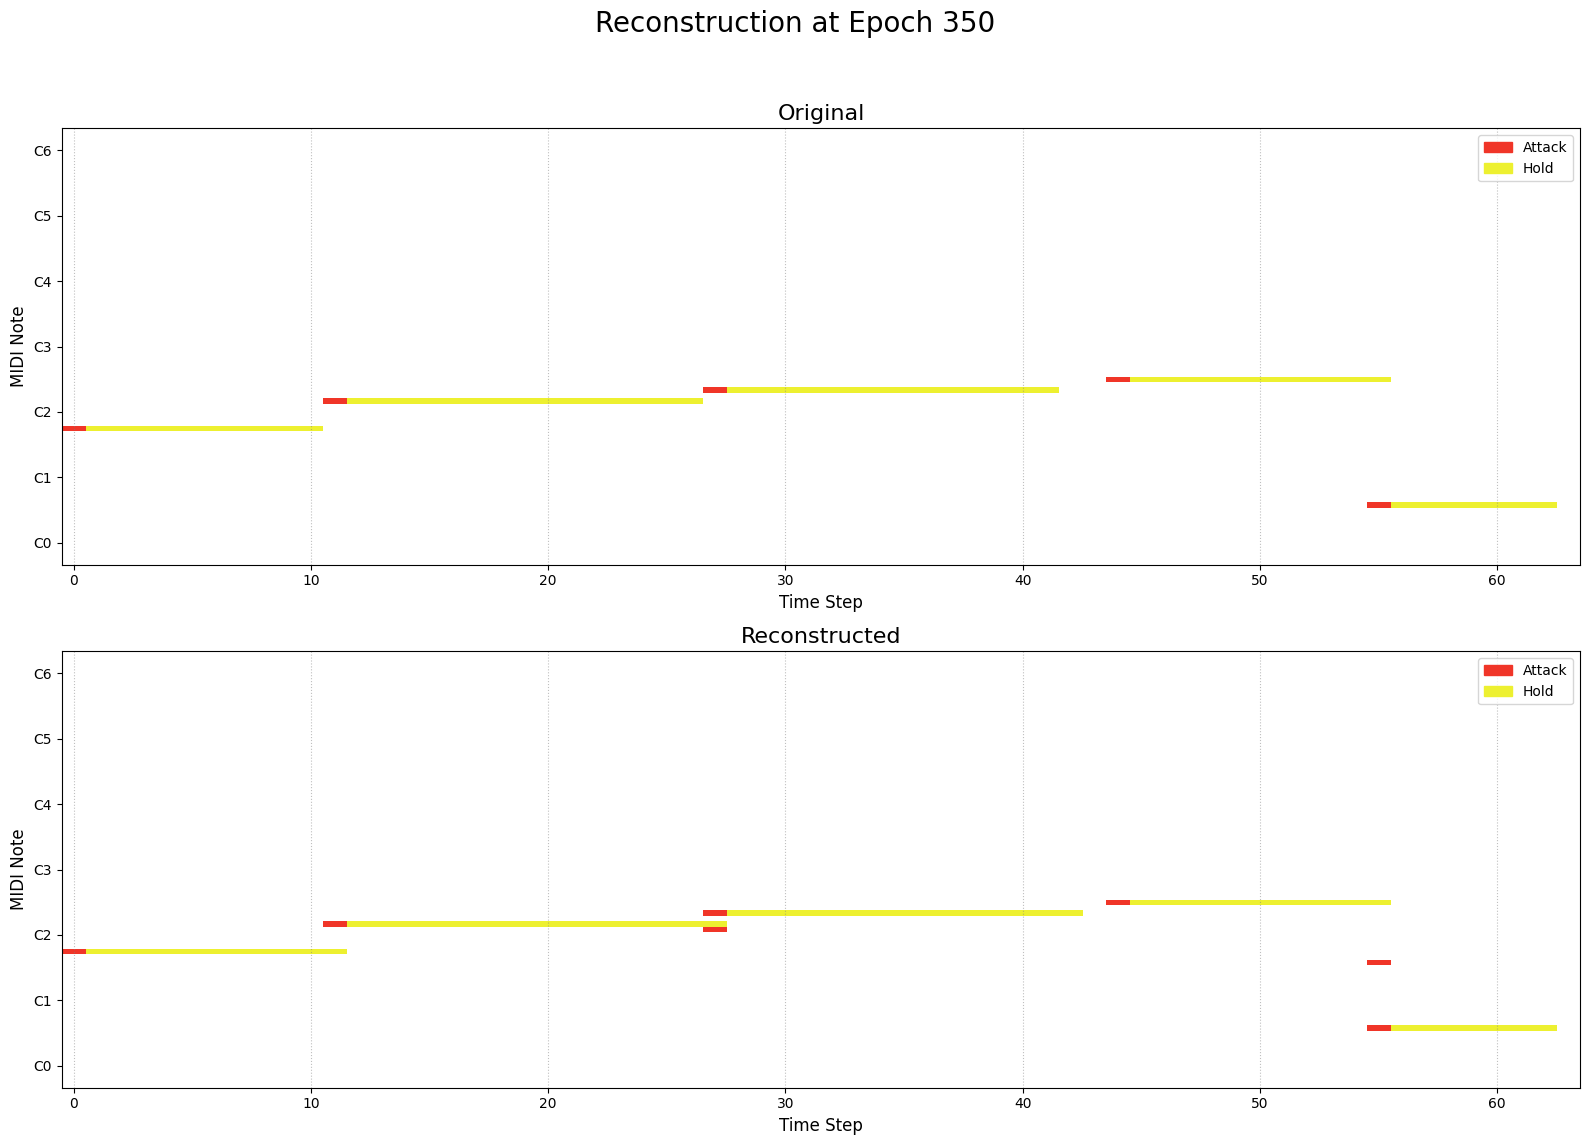

____________________________________________________________ 



Epoch 351/400 [Training]: 100%|██████████| 3660/3660 [01:40<00:00, 36.60it/s, Loss=0.0510, Recon=0.0156, KL=1.3077, beta=0.0500]



Epoch 351 Summary: Avg Train Loss: 0.0022, Avg Val Loss: 0.0261


Epoch 352/400 [Training]: 100%|██████████| 3660/3660 [01:41<00:00, 35.98it/s, Loss=0.0032, Recon=0.0006, KL=0.6506, beta=0.0500]



Epoch 352 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0261


Epoch 353/400 [Training]: 100%|██████████| 3660/3660 [01:38<00:00, 37.10it/s, Loss=0.0076, Recon=0.0008, KL=0.7362, beta=0.0500]



Epoch 353 Summary: Avg Train Loss: 0.0021, Avg Val Loss: 0.0261


Epoch 354/400 [Training]:  70%|██████▉   | 2554/3660 [02:12<2:04:47,  6.77s/it, Loss=0.0029, Recon=0.0029, KL=0.5732, beta=0.0500]

In [ ]:
train(model, experiment_name="model free bits")